In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Konfigurasi agar plot muncul di notebook
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
def load_data(filename):
    # Daftar kemungkinan lokasi file (Relative paths)
    # Ini akan mengecek folder data di berbagai lokasi relatif
    possible_paths = [
        f"../../data/{heart_failure_clinical_records_dataset.csv}",      # Jika notebook di uts/notebooks/
        f"../data/{heart_failure_clinical_records_dataset.csv}",         # Jika notebook naik 1 level
        f"data/{heart_failure_clinical_records_dataset.csv}",            # Jika folder data ada di sebelah notebook
        f"{heart_failure_clinical_records_dataset.csv}",                 # Jika file ada di folder yang sama
        f"/content/{heart_failure_clinical_records_dataset.csv}",        # Path default Colab root
        f"/content/data/{heart_failure_clinical_records_dataset.csv}"    # Path default Colab folder data
    ]

    for path in possible_paths:
        if os.path.exists(path):
            print(f"SUKSES: File ditemukan di: {path}")
            return pd.read_csv(path)

    # Jika loop selesai dan file tidak ketemu
    raise FileNotFoundError(f"ERROR: File '{heart_failure_clinical_records_dataset.csv}' tidak ditemukan. Pastikan Anda sudah upload file csv ke Google Colab!")

In [3]:
import pandas as pd
import os

# INI ADALAH ALAMAT LENGKAP FILE KAMU (ABSOLUTE PATH)
# Huruf 'r' di depan tanda kutip itu WAJIB di Windows agar garis miring (\) terbaca benar
file_path = r'C:\kelompok-11-Machine-Learning\data\heart_failure_clinical_records_dataset.csv'

print(f"Mencoba membaca file dari: {file_path}")

# Cek apakah file benar-benar ada di mata Python
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("✅ SUKSES: Data berhasil dimuat!")
    display(df.head())
else:
    print("❌ ERROR: Python tetap tidak bisa melihat file tersebut.")
    print("Coba cek apakah nama filenya benar-benar 'heart_failure_clinical_records_dataset.csv'?")
    print("Atau mungkin namanya 'heart_failure_clinical_records_dataset (1).csv'?")

Mencoba membaca file dari: C:\kelompok-11-Machine-Learning\data\heart_failure_clinical_records_dataset.csv
✅ SUKSES: Data berhasil dimuat!


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
print("Informasi Dataset:")
df.info()

print("\nStatistik Deskriptif:")
display(df.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


C:\Users\THINKPAD L450\AppData\Local\Temp\ipykernel_6376\857248754.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DEATH_EVENT', data=df, palette='viridis')


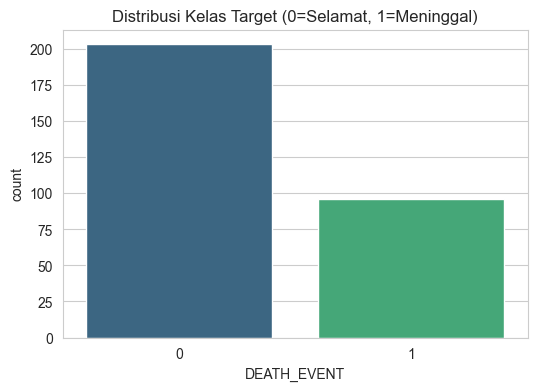

Jumlah sampel per kelas:
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


In [5]:
# Cek apakah data imbalance atau tidak
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=df, palette='viridis')
plt.title('Distribusi Kelas Target (0=Selamat, 1=Meninggal)')
plt.show()

print("Jumlah sampel per kelas:")
print(df['DEATH_EVENT'].value_counts())

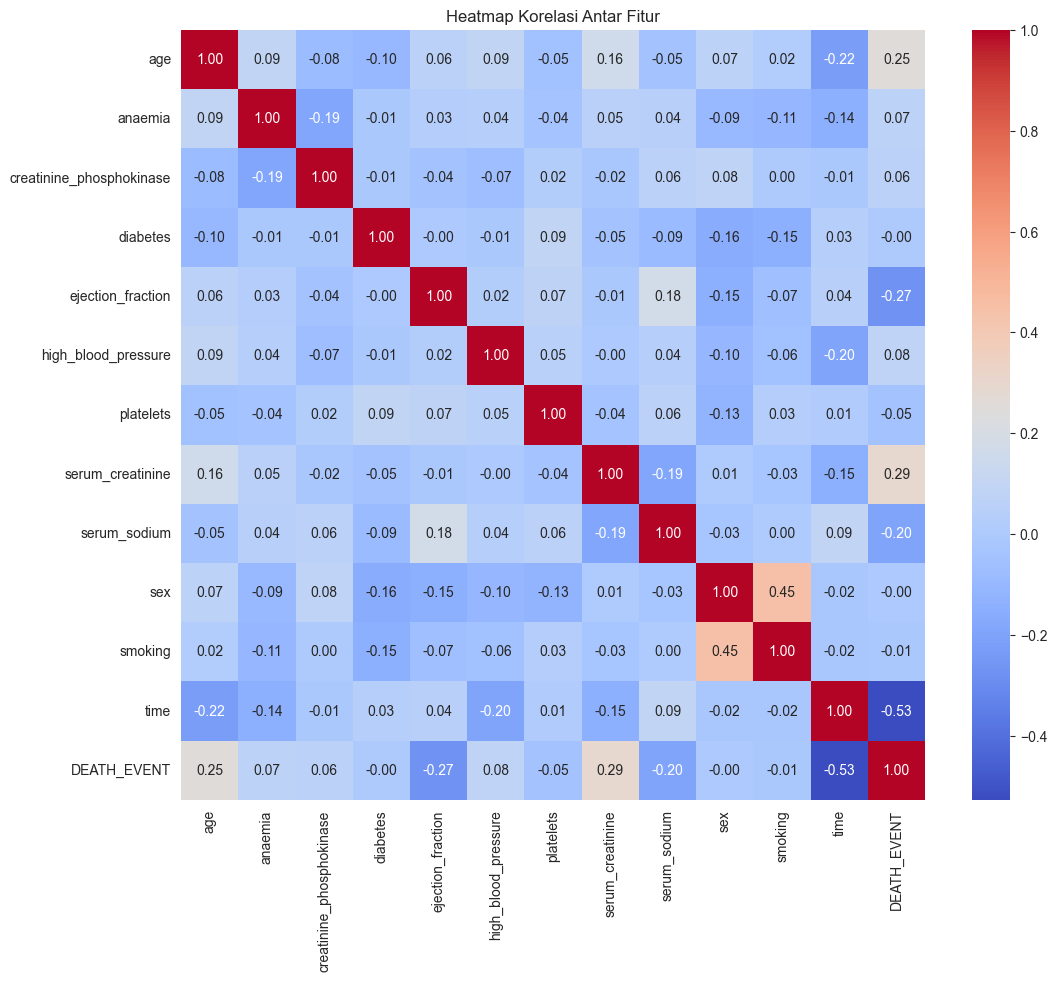

In [6]:
plt.figure(figsize=(12, 10))
# Membuat heatmap untuk melihat hubungan antar variabel
# numeric_only=True biar aman dari error versi pandas baru
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

In [7]:
# Pisahkan Fitur (X) dan Target (y)
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Split Data (80% Train, 20% Test)
# stratify=y WAJIB dipakai karena data tidak seimbang (imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Jumlah Data Training: {X_train.shape[0]}")
print(f"Jumlah Data Testing: {X_test.shape[0]}")

Jumlah Data Training: 239
Jumlah Data Testing: 60


In [8]:
# Inisialisasi Scaler
scaler = StandardScaler()

# Fit pada data training, lalu transform data training dan testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ubah kembali ke DataFrame agar enak dilihat
features = X.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features)

print("Data setelah scaling (5 baris pertama):")
display(X_train_scaled_df.head())

Data setelah scaling (5 baris pertama):


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-0.269050,1.110696,-0.200735,-0.900337,0.176528,-0.770281,-1.004722,-0.360437,0.559915,-1.333818,-0.682831,-0.467847
1,-0.706883,-0.900337,-0.534318,1.110696,1.847425,-0.770281,1.051685,-0.544467,-0.345802,0.749728,-0.682831,-1.359167
2,1.219579,-0.900337,-0.020580,-0.900337,-1.494369,1.298227,0.013401,0.467698,-1.477949,0.749728,-0.682831,-1.591685
3,0.256348,-0.900337,-0.455129,-0.900337,-1.076645,-0.770281,-0.178127,0.927773,-0.345802,0.749728,-0.682831,1.121028
4,-1.407414,-0.900337,-0.020580,-0.900337,-1.494369,1.298227,-1.387778,0.191653,-0.345802,0.749728,-0.682831,0.681827


In [9]:
# Tentukan lokasi penyimpanan
# Kita coba simpan di folder 'data' utama jika ada, atau di folder saat ini
output_dir = '../../data/'

# Cek apakah folder itu ada, kalau tidak simpan di folder sekarang aja
if not os.path.exists(output_dir):
    output_dir = ''

print(f"Menyimpan file csv hasil proses ke: {output_dir if output_dir else 'Folder Saat Ini'}")

# Simpan ke CSV
X_train_scaled_df.to_csv(output_dir + 'X_train_scaled.csv', index=False)
X_test_scaled_df.to_csv(output_dir + 'X_test_scaled.csv', index=False)
y_train.to_csv(output_dir + 'y_train.csv', index=False)
y_test.to_csv(output_dir + 'y_test.csv', index=False)

print("SUKSES: Semua file data bersih (X_train, X_test, dll) sudah disimpan.")

Menyimpan file csv hasil proses ke: ../../data/
SUKSES: Semua file data bersih (X_train, X_test, dll) sudah disimpan.
